In [1]:
# Use warpx_env as kernal
from PIL import Image
import numpy as np
import h5py
import scipy as sp # For finding the centroid
from scipy.ndimage import median_filter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid, trapezoid, quad, quad_vec
from scipy.optimize import curve_fit
import matplotlib.transforms as transforms
from scipy.ndimage import gaussian_filter
from scipy.signal import savgol_filter
from scipy.signal import wiener
import scipy.constants as cons
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
import scipy
from scipy.interpolate import interp1d
from matplotlib.ticker import NullFormatter
import scipy.constants as sc
import math
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from lasy.laser import Laser
from lasy.profiles.gaussian_profile import GaussianProfile
from lasy.utils.laser_utils import get_full_field
from lasy.utils.laser_utils import get_duration, get_laser_fluence, get_laser_power, field_to_vector_potential,get_w0
from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics
from openpmd_viewer import ParticleTracker
pi = cons.pi
clight = cons.speed_of_light
epsilon_0 = cons.epsilon_0
me = cons.electron_mass
qe = cons.elementary_charge
import sys
sys.path.append('/Users/victorflores/warpx_env/WarpX/Warpx_Sims/PIC_Helper')

from PIC_Helper import laser_plasma_para, sim_RZ_para, add_colorbar


In [2]:
path_Rz ='/Users/victorflores/warpx_env/WarpX/Runs_Rz/Laser_Test/diags/diag1'
data= OpenPMDTimeSeries("{}".format(path_Rz),backend="h5py")

In [3]:
# laser_plasma parameters
lam = 800e-9
dens = 0.001
a0 = 2
r = 65e-6
z = [-30.e-6,30.e-6]
ncells = [512,1024]
mode = 2
max_grid_size = [256,256]
gpus = 1

lp_para = laser_plasma_para(lam,dens,a0)
sim_para = sim_RZ_para(lam,r,z,ncells,mode,max_grid_size,gpus)


In [20]:
j = 12
t=data.t[j]
Ey, Ey_info = data.get_field(t=data.t[j], field='E',coord="y", plot=False)
Ez, Ez_info = data.get_field(t=data.t[j], field='E',coord="z", plot=False)
Ex, Ex_info = data.get_field(t=data.t[j], field='E',coord="x", plot=False)
rho_ele, ele_info = data.get_field(t=data.t[j], field='rho_electrons', plot=False)
Ey_slice, Ey_info_slice = data.get_field(t=data.t[j], field='E',coord="y", plot=False, slice_across="r",slice_relative_position= 0)
Ez_slice, Ez_info_slice = data.get_field(t=data.t[j], field='E',coord="z", plot=False, slice_across="r",slice_relative_position= 0)
zmin = Ey_info.zmin
zmax = Ey_info.zmax
rmin = Ey_info.rmin
rmax = Ey_info.rmax
Ey_norm = Ey/lp_para['Enorm']
Ey_slice_norm = Ey_slice / lp_para['Enorm']
delta_tho_ele = ((-rho_ele/qe) - lp_para['ne0'])/ (lp_para['ne0'])
ne_nc = (-rho_ele/qe)/ (lp_para['nc'])
Z = np.linspace(zmin, zmax, len(Ey))
R = np.linspace(rmin, rmax, len(Ey[0]))

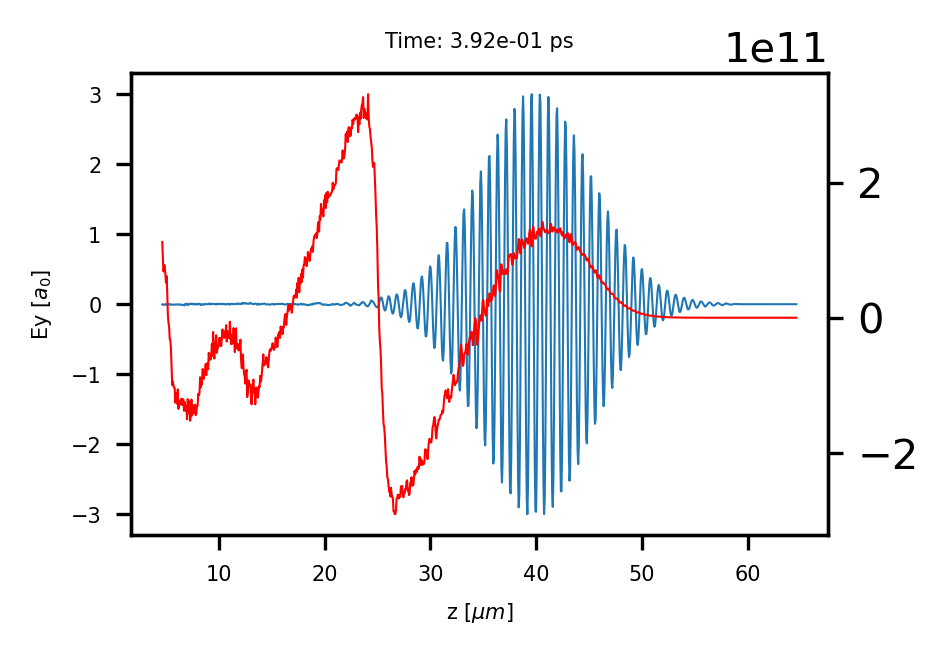

In [21]:
#####################################
fig_width = 3 # Set width to 1.5 inches
fig_height = 2  # Set height to 1.5 inches
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
#charge_bg_dens = ax.pcolormesh(Z,X,rho_ele_dens.T,cmap='Spectral_r')
ax.plot(Z*10**6 , Ey_slice_norm, linewidth = 0.5)
ax2 = ax.twinx()
ax2.plot(Z*10**6 , Ez_slice, linewidth = 0.5,color='red')
ax.set_title('Time: {:.2e} ps'.format(t*10**12),fontsize=5)
ax.tick_params('x',labelsize=5)
ax.tick_params('y',labelsize=5)
ax.set_ylabel(r'Ey [$a_0$]', fontsize = 5)
ax.set_xlabel(r'z [$\mu m$]', fontsize = 5)
plt.show()

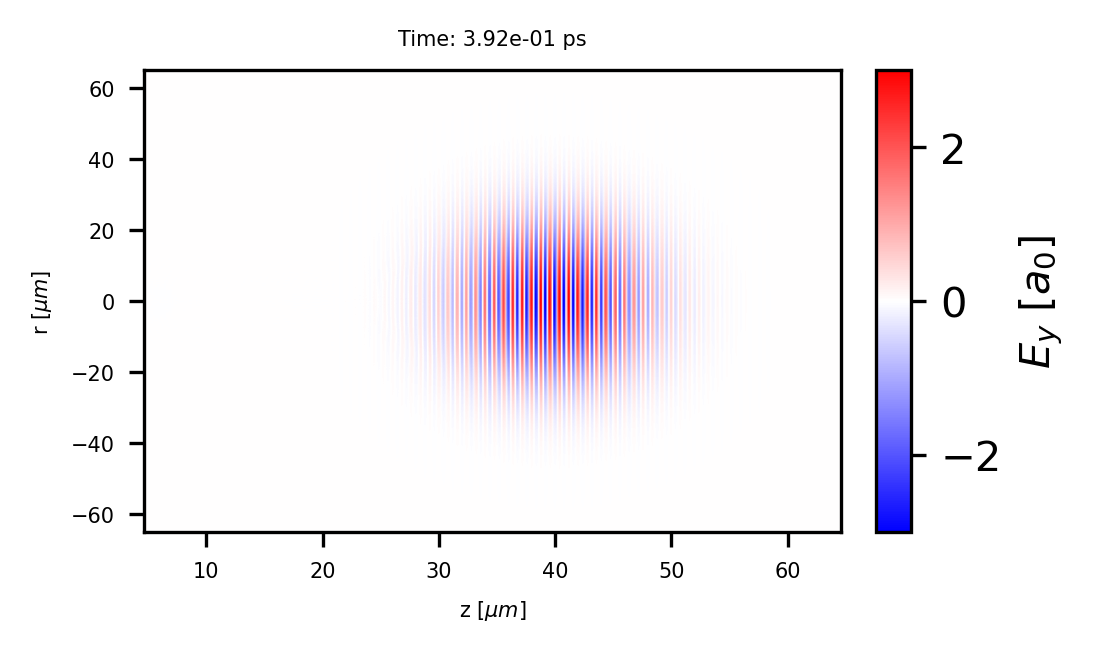

In [22]:
#####################################
fig_width = 3 # Set width to 1.5 inches
fig_height = 2  # Set height to 1.5 inches
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
#charge_bg_dens = ax.pcolormesh(Z,X,rho_ele_dens.T,cmap='Spectral_r')
Ey_field = ax.pcolormesh(Z *10**6, R*10**6, Ey_norm.T, cmap='bwr')
cb1 = add_colorbar(Ey_field)
cb1.set_label('$E_y$ [$a_0$]')
ax.set_title('Time: {:.2e} ps'.format(t*10**12),fontsize=5)
ax.tick_params('x',labelsize=5)
ax.tick_params('y',labelsize=5)
ax.set_ylabel(r'r [$\mu m$]', fontsize = 5)
ax.set_xlabel(r'z [$\mu m$]', fontsize = 5)
plt.show()

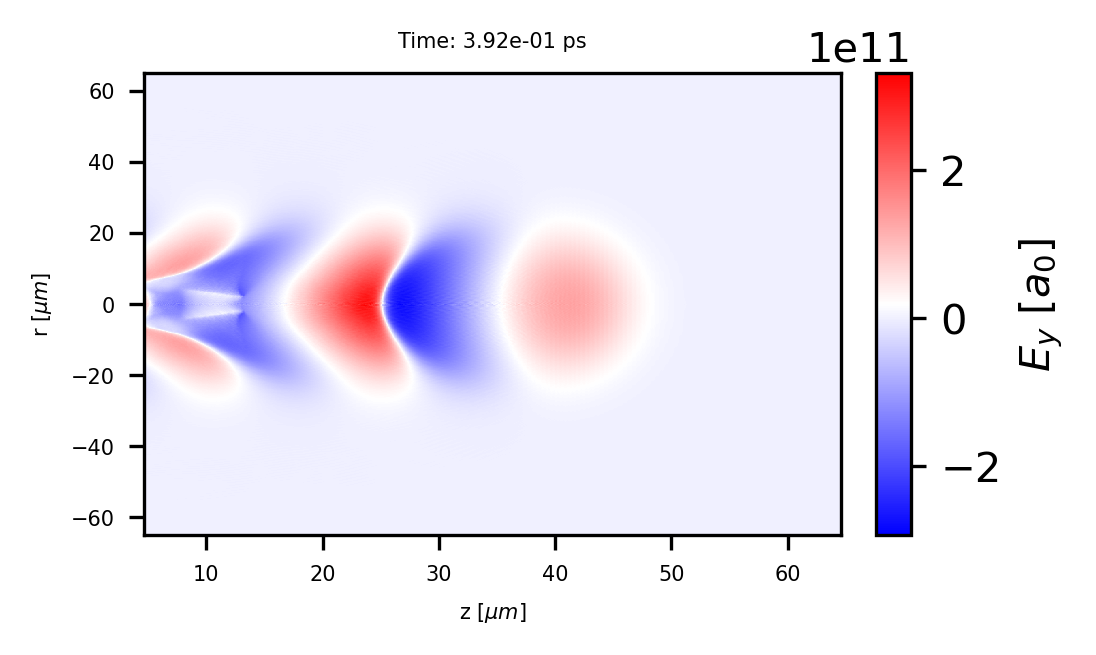

In [24]:
#####################################
fig_width = 3 # Set width to 1.5 inches
fig_height = 2  # Set height to 1.5 inches
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
#charge_bg_dens = ax.pcolormesh(Z,X,rho_ele_dens.T,cmap='Spectral_r')
Ey_field = ax.pcolormesh(Z *10**6, R*10**6, Ez.T, cmap='bwr')
cb1 = add_colorbar(Ey_field)
cb1.set_label('$E_y$ [$a_0$]')
ax.set_title('Time: {:.2e} ps'.format(t*10**12),fontsize=5)
ax.tick_params('x',labelsize=5)
ax.tick_params('y',labelsize=5)
ax.set_ylabel(r'r [$\mu m$]', fontsize = 5)
ax.set_xlabel(r'z [$\mu m$]', fontsize = 5)
plt.show()

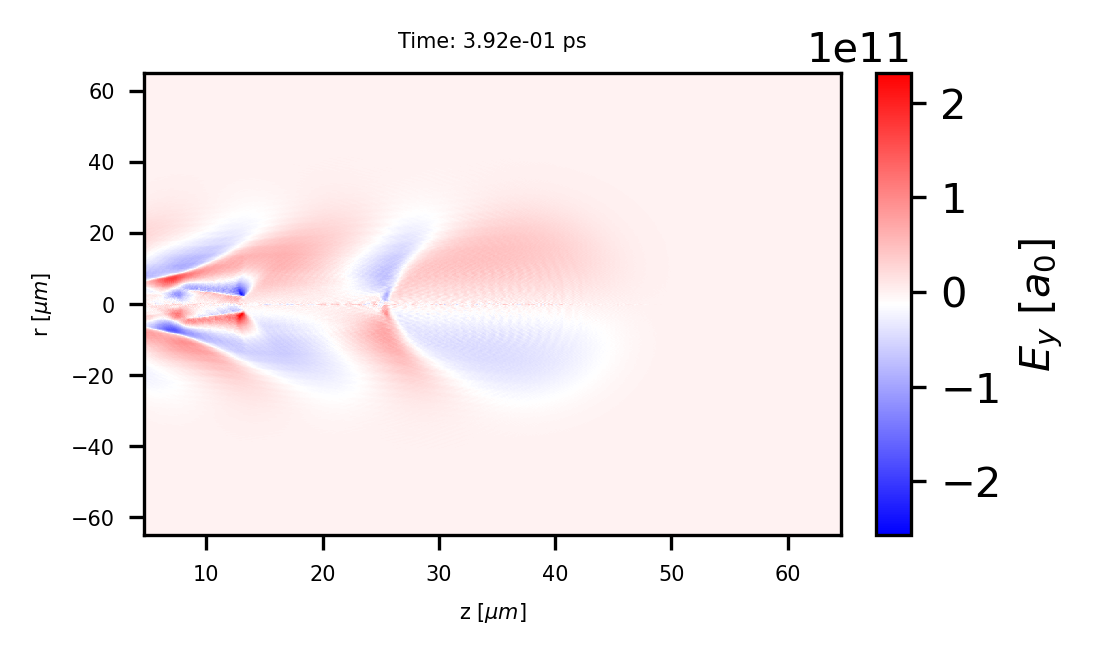

In [25]:
#####################################
fig_width = 3 # Set width to 1.5 inches
fig_height = 2  # Set height to 1.5 inches
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
#charge_bg_dens = ax.pcolormesh(Z,X,rho_ele_dens.T,cmap='Spectral_r')
Ey_field = ax.pcolormesh(Z *10**6, R*10**6, Ex.T, cmap='bwr')
cb1 = add_colorbar(Ey_field)
cb1.set_label('$E_y$ [$a_0$]')
ax.set_title('Time: {:.2e} ps'.format(t*10**12),fontsize=5)
ax.tick_params('x',labelsize=5)
ax.tick_params('y',labelsize=5)
ax.set_ylabel(r'r [$\mu m$]', fontsize = 5)
ax.set_xlabel(r'z [$\mu m$]', fontsize = 5)
plt.show()

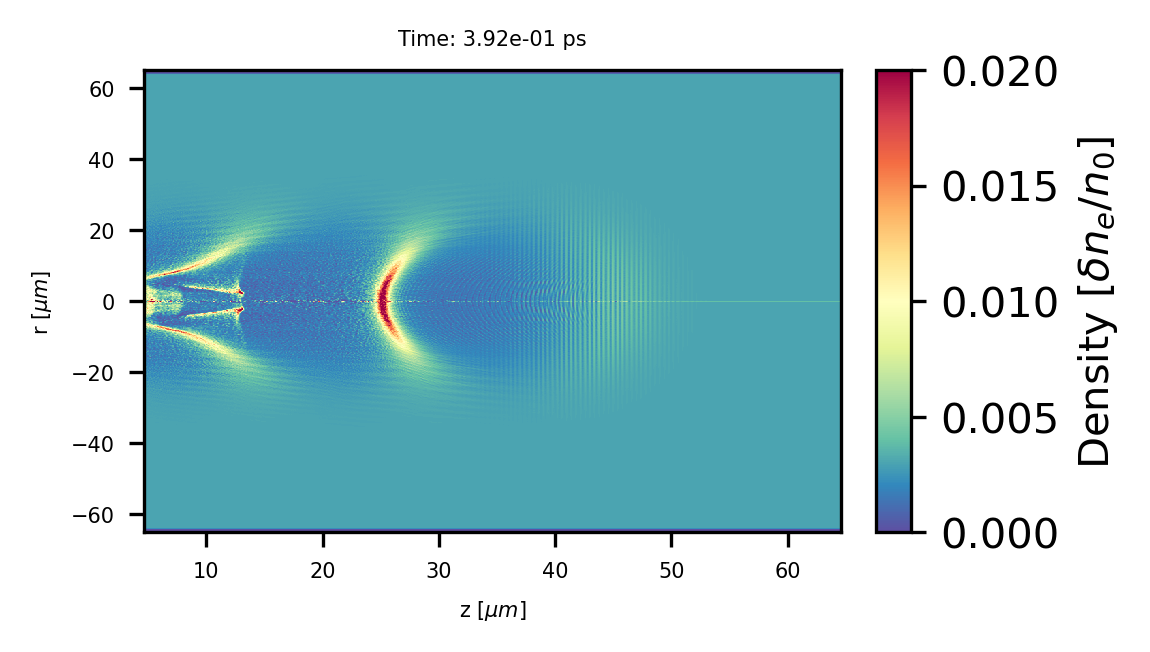

In [23]:
#####################################
fig_width = 3 # Set width to 1.5 inches
fig_height = 2  # Set height to 1.5 inches
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
#charge_bg_dens = ax.pcolormesh(Z,X,rho_ele_dens.T,cmap='Spectral_r')
dens_map = ax.pcolormesh(Z *10**6, R*10**6, ne_nc.T, cmap='Spectral_r',vmin=0,vmax=0.02)
cb1 = add_colorbar(dens_map)
cb1.set_label(r'Density [$\delta n_e / n_0$]')
ax.set_title('Time: {:.2e} ps'.format(t*10**12),fontsize=5)
ax.tick_params('x',labelsize=5)
ax.tick_params('y',labelsize=5)
ax.set_ylabel(r'r [$\mu m$]', fontsize = 5)
ax.set_xlabel(r'z [$\mu m$]', fontsize = 5)
plt.show()